In [189]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [199]:
class NN2Hidden:
    def __init__(self, layers_dim, input_dim, num_classes, batch_size, epochs):
        self.batch_size = batch_size
        self.epochs = epochs
        
        self.model = Sequential()
        self.model.add(Dense(layers_dim, activation='relu', input_shape=(input_dim,)))
        self.model.add(Dense(layers_dim, activation='relu'))
        self.model.add(Dense(layers_dim, activation='relu'))
        self.model.add(Dense(num_classes, activation='softmax'))
        
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def fit(self, X, y, validation_data):
        self.model.fit(X, y,
          batch_size=self.batch_size, epochs=self.epochs,
          verbose=1,
          validation_data=validation_data)
        return self
        
    def evaluate(self, X, y):
        return self.model.evaluate(X, y, verbose=1)
        
    def predict_classes(self, X):
        return self.model.predict_classes(X)

In [200]:
#MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [201]:
#Уплощаем каждую картинку: 28*28=784
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Чтобы значения были в интервале [0, 1]
X_train = X_train/255
X_test = X_test/255

In [202]:
#One-hot энкодим классы, чтобы каждому классу соответствовал массив (:, 10)
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

In [203]:
mnist_nn = NN2Hidden(512, 784, 10, 128, 4)

In [204]:
mnist_nn = mnist_nn.fit(X_train, y_train, (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 8s - loss: 0.0369 - acc: 0.9873 - val_loss: 0.0215 - val_acc: 0.9927
Epoch 2/4
60000/60000 [==============================] - 8s - loss: 0.0158 - acc: 0.9947 - val_loss: 0.0155 - val_acc: 0.9946
Epoch 3/4
60000/60000 [==============================] - 7s - loss: 0.0110 - acc: 0.9962 - val_loss: 0.0159 - val_acc: 0.9947
Epoch 4/4
60000/60000 [==============================] - 6s - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0166 - val_acc: 0.9942


In [205]:
score = mnist_nn.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

 9408/10000 [===========================>..] - ETA: 0s('Test score:', 0.016602871362931908)
('Test accuracy:', 0.99423999881744385)


In [217]:
#make_moons
X, y = make_moons(n_samples=10000, noise=0.1, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [218]:
y_train_cat = np_utils.to_categorical(y_train, 2)
y_test_cat = np_utils.to_categorical(y_test, 2)

In [209]:
moons_nn = NN2Hidden(20, 2, 2, 1000, 25)

In [219]:
moons_nn = moons_nn.fit(X_train, y_train_cat, (X_test, y_test_cat))

Train on 6000 samples, validate on 4000 samples
Epoch 1/25
6000/6000 [==============================] - 0s - loss: 0.1853 - acc: 0.9167 - val_loss: 0.1889 - val_acc: 0.9195
Epoch 2/25
6000/6000 [==============================] - 0s - loss: 0.1785 - acc: 0.9190 - val_loss: 0.1820 - val_acc: 0.9230
Epoch 3/25
6000/6000 [==============================] - 0s - loss: 0.1714 - acc: 0.9227 - val_loss: 0.1748 - val_acc: 0.9268
Epoch 4/25
6000/6000 [==============================] - 0s - loss: 0.1641 - acc: 0.9278 - val_loss: 0.1672 - val_acc: 0.9300
Epoch 5/25
6000/6000 [==============================] - 0s - loss: 0.1563 - acc: 0.9328 - val_loss: 0.1594 - val_acc: 0.9338
Epoch 6/25
6000/6000 [==============================] - 0s - loss: 0.1484 - acc: 0.9385 - val_loss: 0.1514 - val_acc: 0.9375
Epoch 7/25
6000/6000 [==============================] - 0s - loss: 0.1402 - acc: 0.9428 - val_loss: 0.1430 - val_acc: 0.9417
Epoch 8/25
6000/6000 [==============================] - 0s - loss: 0.1318 - a

 997856/1000000 [============================>.] - ETA: 0s

(<matplotlib.figure.Figure at 0x13c0f4490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x145fae310>)

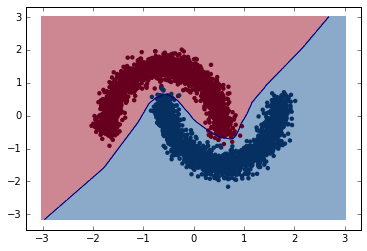

In [222]:
plot_decision_boundary(X_test, y_test, moons_nn, cmap='RdBu')

In [221]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Предсказываем значение для точек графика
    labels = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

    
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    ax.contour(xx, yy, z, levels=[0.5], color='black')

    # Рисуем разделяющую поверхность
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax